# MLR 503 - Homework 1
Submitted by: Lujain Khalil

AUS ID: @00082632

## Q1: Confusion Matrix

### Part 1: Calculating metrics for a given confusion matrix 

You are provided with the following confusion matrix for a binary classification problem:
- True Positives (TP): 50
- False Positives (FP): 10
- True Negatives (TN): 90
- False Negatives (FN): 20

#### 1. Construct the confusion matrix.

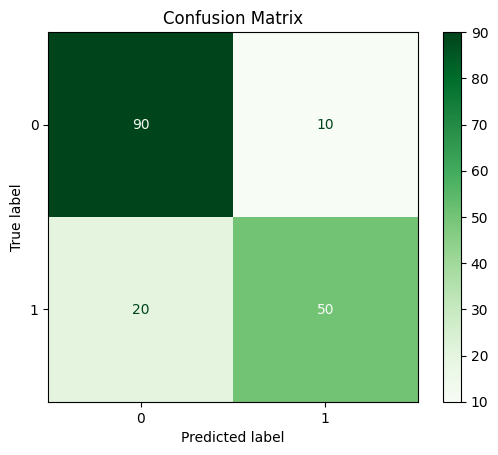

In [160]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

TP = 50
FP = 10
TN = 90
FN = 20

cm = ConfusionMatrixDisplay(confusion_matrix=np.array([[TN, FP], [FN, TP]]), display_labels=['0', '1'])
cm.plot(cmap='Greens')
plt.title("Confusion Matrix")
plt.show()

#### 2. Calculate the following metrics: Accuracy, Precision, Recall, F1 Score, Arithmetic Mean, and Geometric Mean.

In [161]:
from math import sqrt

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)
arithmetic_mean = (precision + recall) / 2
geometric_mean = sqrt(precision *recall)

print(f'Accuracy = {round(accuracy, 3)}')
print(f'Precision = {round(precision, 3)}')
print(f'Recall = {round(recall, 3)}\n')

print(f'Arithmetic mean = {round(arithmetic_mean, 3)}')
print(f'F1 Score = {round(f1_score, 3)}')
print(f'Geometric mean = {round(geometric_mean, 3)}')

Accuracy = 0.824
Precision = 0.833
Recall = 0.714

Arithmetic mean = 0.774
F1 Score = 0.769
Geometric mean = 0.772


#### 3. Explain the significance of these metrics.

- *Accuracy* suggests that the model was able to correctly classify 82.4% of the data
- *Precision* suggests that 83.3% of the positive class predicitions were correct. This reflects the models ability to avoid false positives.
- *Recall* suggests that 71.4% of the actual positive class was predicted correctly. This reflects the models ability to avoid false negatives.

The three ways to calculate mean are as follows:
- *Arithmetic mean* of precision and recall gives a different way to evaluate model performance by considering both precision and recall equally. This, however, is not very reliable when the difference between precision and recall is high.
- *F1-score*, also known as the harmonic mean, provides a more balanced measure of recall and precision by penalizing extreme values. This can be observed above with a calculated F1 score of 0.769, and an arithmetic mean of 0.774
- *Geometric mean* is mainly used for multiplicative processes and provides a more balanced measure of performance, penalizing extreme values. 

### Part 2: Time-varying confusion matrix and exact equality
Consider a scenario where the confusion matrix evolves over time. The values of 𝑇𝑃, 𝐹𝑃, 𝑇𝑁, and 𝐹𝑁 are functions of time 𝑡:

$$ 𝑇𝑃: 100 + 5𝑡 $$
$$ 𝐹𝑃: 20 − 2𝑡 $$
$$ 𝑇𝑁: 200 + 3𝑡 $$
$$ 𝐹𝑁: 30 − 𝑡 $$

#### 1. Derive expressions for precision, recall, F1 score (harmonic mean), arithmetic mean, and geometric mean as functions of time 𝑡.

$$ \text{Precision} = \frac{TP}{TP+FP} = \frac{100+5t}{(100+5t)+(20-2t)} = \frac{100+5t}{120+3t} $$

$$ \text{Recall} = \frac{TP}{TP+FN} = \frac{100+5t}{(100+5t)+(30-t)} = \frac{100+5t}{130+4t} $$

$$ \text{F1-Score} 
= 2 * \frac{\text{Precision} * \text{Recall}}{\text{Precision} + \text{Recall}} 
= 2 * \frac{(\frac{100+5t}{120+3t}) * (\frac{100+5t}{130+4t})}{(\frac{100+5t}{120+3t}) + (\frac{100+5t}{130+4t})} 
= 2 * \frac{\frac{(100+5t)^2}{(120+3t)(130+4t)}}{\frac{(100+5t)(130+4t)+(100+5t)(120+3t)}{(120+3t)(130+4t)}} 
= \frac{2(100+5t)^2}{(100+5t)(130+4t+120+3t)}
= \frac{2(100+5t)}{250+7t}
$$

$$ \text{Arithmetic Mean}
= \frac{\text{Precision} + \text{Recall}}{2}
= \frac{\frac{100+5t}{120+3t}+\frac{100+5t}{130+4t}}{2}
= \frac{(100+5t)(130+4t)+(100+5t)(120+3t)}{2(120+3t)(130+4t)}
= \frac{(100+5t)(130+4t+120+3t)}{2(120+3t)(130+4t)}
= \frac{(100+5t)(250+7t)}{2(120+3t)(130+4t)}
$$

$$ \text{Geometric Mean}
= \sqrt{\text{Precision}*\text{Recall}}
= \sqrt{\frac{100+5t}{120+3t}*\frac{100+5t}{130+4t}}
= \sqrt{\frac{(100+5t)^2}{(120+3t)(130+4t)}}
= \frac{100+5t}{\sqrt{(120+3t)(130+4t)}}
$$

Let $F(t), A(t), \text{and }G(t)$ be functions of time represantative of F1-Score, Arithmetic Mean, and Geometric Mean, respectively. Then:

$$ F(t) = \frac{2(100+5t)}{250+7t} $$
$$ A(t) = \frac{(100+5t)(250+7t)}{2(120+3t)(130+4t)} $$
$$ G(t) = \frac{100+5t}{\sqrt{(120+3t)(130+4t)}} $$

#### 2. Find the time t where the three means are exactly equal.

In [162]:
from sympy import symbols, Eq, solve

t = symbols('t')
f1_exp = (2*(100 + 5*t)) / (250 + 7*t)
arithmetic_exp = ((100 + 5*t)*(250 + 7*t)) / (2*(120 + 3*t)*(130 + 4*t))
geometric_exp = (100 + 5*t) / ((120 + 3*t)*(130 + 4*t))**0.5

# Findting t values for the three equality combinations

eq1 = Eq(f1_exp, arithmetic_exp) 
eq2 = Eq(f1_exp, geometric_exp) 
eq3 = Eq(arithmetic_exp, geometric_exp)

print(f'F1-Score = Arithmetic Mean: {solve(eq1, t)}')
print(f'F1-Score = Geometric Mean: {solve(eq2, t)}')
print(f'Arithmetic = Geometric Mean: {solve(eq3, t)}')


F1-Score = Arithmetic Mean: [-20, -10]
F1-Score = Geometric Mean: [-20.0000000000000, -10.0000000000000]
Arithmetic = Geometric Mean: [-20.0000000000000, -10.0000000000000]


In [163]:
# Verifying the above
print(f'F1-Score at t = -10: {f1_exp.subs(t, -10)}')
print(f'Arithmetic Mean at t = -10: {arithmetic_exp.subs(t, -10)}')
print(f'Geometric Mean at t = -10: {geometric_exp.subs(t, -10)}\n')

print(f'F1-Score at t = -20: {f1_exp.subs(t, -20)}')
print(f'Arithmetic Mean at t = -20: {arithmetic_exp.subs(t, -20)}')
print(f'Geometric Mean at t = -20: {geometric_exp.subs(t, -20)}')

F1-Score at t = -10: 5/9
Arithmetic Mean at t = -10: 5/9
Geometric Mean at t = -10: 0.555555555555556

F1-Score at t = -20: 0
Arithmetic Mean at t = -20: 0
Geometric Mean at t = -20: 0


We can see that there are two points where all three means are exactly equal, $ t = -10 $ and $ t = -20 $. This, however, is only a numerical solution. In reality, time is always under a constraint where  $ t > 0 $. Hence, there is no point in time where all three means are exactly equal.

### Part 3: Approximate equality of means with tolerance

You are tasked to determine when the three means are approximately equal within a specified tolerance (ε = 0.01), where 𝑡 is limited to 0 to 20 (step size = 0.01).

#### 1. Derive the condition for approximate equality within tolerance.

Let $x$ and $y$ be any two variables that are exactly equal. Hence, $|x - y| = 0$. 

Now, let the variables $x$ and $y$ be approximately equal within a specified tolerance ε. Hence, $|x - y| \leq ε$

Let $F(t), A(t), \text{and } G(t)$ be approximately equal with a tolerance of $ε = 0.01$. Then:
$$ |F(t) - A(t)| \leq 0.01 $$
$$ |F(t) - G(t)| \leq 0.01 $$
$$ |A(t) - G(t)| \leq 0.01 $$

#### 2. Find the time t when differences between the three means are all ≤ 0.01 in the range 0 ≤ t ≤ 20.

In [164]:
t = symbols('t')

f1_exp = (2 * (100 + 5*t)) / (250 + 7*t)
arithmetic_exp = ((100 + 5*t) * (250 + 7*t)) / (2 * (120 + 3*t) * (130 + 4*t))
geometric_exp = (100 + 5*t) / ((120 + 3*t) * (130 + 4*t))**0.5

epsilon = 0.01
step_size = 0.01

t_vals = []

for t_val in np.arange(0, 20.01, step_size):
    f1_value = f1_exp.subs(t, t_val)
    arithmetic_value = arithmetic_exp.subs(t, t_val)
    geometric_value = geometric_exp.subs(t, t_val)
    
    diff_f1_arithmetic = abs(f1_value - arithmetic_value)
    diff_f1_geometric = abs(f1_value - geometric_value)
    diff_arithmetic_geometric = abs(arithmetic_value - geometric_value)
    
    if diff_f1_arithmetic <= epsilon and diff_f1_geometric <= epsilon and diff_arithmetic_geometric <= epsilon:
        t_vals.append(round(t_val, 2))

print(f'The three means are approximately equal at t = {t_vals}')

The three means are approximately equal at t = [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0, 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09, 1.1, 1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2, 1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3, 1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4, 1.41, 1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5, 1.51, 1.52, 1.53, 1.54, 1.55, 1.56, 1.57, 1.58, 1.59, 1.6, 1.6

The multitude of values is difficult to read. A plot is generated instead of easier interpretation. 

The y-axis represents the absolute value of the difference between any two functions. The x-axis represents time.

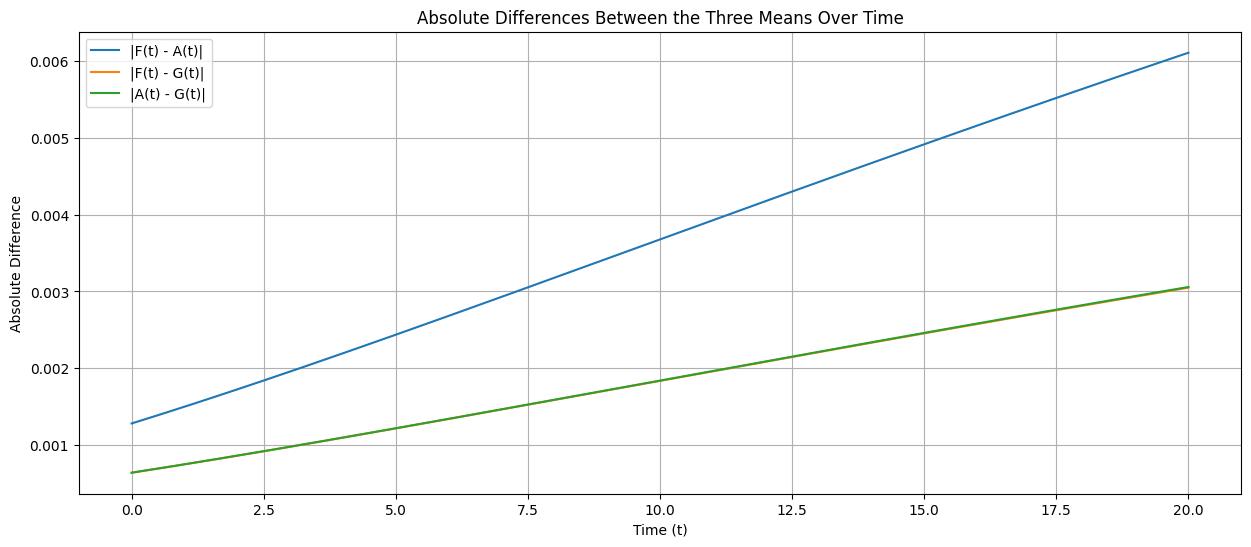

In [165]:
diff_f1_arithmetic = []
diff_f1_geometric = []
diff_arithmetic_geometric = []

for t_val in np.arange(0, 20.01, step_size):
    f1_value = f1_exp.subs(t, t_val)
    arithmetic_value = arithmetic_exp.subs(t, t_val)
    geometric_value = geometric_exp.subs(t, t_val)
    
    diff_f1_arithmetic.append(abs(f1_value - arithmetic_value))
    diff_f1_geometric.append(abs(f1_value - geometric_value))
    diff_arithmetic_geometric.append(abs(arithmetic_value - geometric_value))

plt.figure(figsize=(15, 6))

plt.plot(np.arange(0, 20.01, step_size), diff_f1_arithmetic, label='|F(t) - A(t)|')
plt.plot(np.arange(0, 20.01, step_size), diff_f1_geometric, label='|F(t) - G(t)|')
plt.plot(np.arange(0, 20.01, step_size), diff_arithmetic_geometric, label='|A(t) - G(t)|')

plt.xlabel('Time (t)')
plt.ylabel('Absolute Difference')
plt.title('Absolute Differences Between the Three Means Over Time')
plt.legend()

plt.grid(True)
plt.show()


In [166]:
print(f'|F(t) - A(t)| ranges from {min(diff_f1_arithmetic)} to {max(diff_f1_arithmetic)}')
print(f'|F(t) - G(t)| ranges from {min(diff_f1_geometric)} to {max(diff_f1_geometric)}')
print(f'|A(t) - G(t)| ranges from {min(diff_arithmetic_geometric)} to {max(diff_arithmetic_geometric)}')

|F(t) - A(t)| ranges from 1/780 to 0.00610732609656672
|F(t) - G(t)| ranges from 0.000640769025435639 to 0.00304913098291615
|A(t) - G(t)| ranges from 0.000641282256615638 to 0.00305819511365057


We can observe that there is no point where the difference exceeds 0.01 from any of the three plots. Approximate equality is achieved for all $t \in [0, 20]$ with a tolerance of 0.01.

It also seems like $|F(t) - G(t)|$ and $|A(t) - G(t)|$ result in almost the same exact differences, which is why the orange line is not visible - it's just hiding under the green line.

## Q2: Pearson Correlation
You are analyzing the relationship between temperature and ice cream sales. This question involves calculating the Pearson correlation coefficient for a simple dataset, followed by exploring different types of noise.

### Part 1:
Given the following data for temperature (in °C) and ice cream sales (in units):
- Temperature: [10, 15, 20, 25, 30]
- Sales: [100, 150, 200, 250, 300]

Calculate the Pearson correlation coefficient

In [167]:
import pandas as pd

temperature = np.array([10, 15, 20, 25, 30])
sales = np.array([100, 150, 200, 250, 300])

df = pd.DataFrame({'Temperature': temperature, 'Sales': sales})
df

,Temperature,Sales
0,10,100
1,15,150
2,20,200
3,25,250
4,30,300


In [168]:
from scipy.stats import pearsonr

original_pearson_coeff, original_pearson_pvalue = pearsonr(temperature, sales)
print(f'Pearsons Coefficient: {original_pearson_coeff}')
print(f'P-value: {original_pearson_pvalue}')
print(f'P-value < 0.05? {original_pearson_pvalue < 0.05}\n')

Pearsons Coefficient: 0.9999999999999999
P-value: 0.0
P-value < 0.05? True



Let the null hypothesis be as follows:

$$ H_0 = \text{There is no linear relationship between Temparature and Sales} $$

The calculated pearson's correlation coefficient between Temperature and Sales is almost exactly equal to 1. The calculated p-value 0 is < 0.05.

This allows us to reject the null hypothesis, meaning there is sufficient statistical evidence to conclude that there is a linear relationshiop between Temperature and Sales. The positive value that is almost exaclty equal to 1 implies that the linear relationship is a perfectly positive one. It is also quite clear that $ \text{Sales} = 10*\text{Temparature} $ from just looking at the values.

### Part 2:  Exploring Different Gaussian Noises
Using the same temperature dataset and sales:
- Temperature: [10, 15, 20, 25, 30]
- Sales: [100, 150, 200, 250, 300]

#### 1. Add different Gaussian noise to create two noisy datasets.

Two different random gaussian noises are added to the orginal dataset, resulting in two new noisy datasets.

In [169]:
# Mean = 0 and Standard Deviation = 5
n1 = np.random.normal(0, 5, size=sales.shape) 
n2 = np.random.normal(0, 5, size=sales.shape)

noisy_sales_1 = sales + n1
noisy_sales_2 = sales + n2

noisy_df_1 = pd.DataFrame({'Temperature': temperature, 'Sales': noisy_sales_1})
noisy_df_2 = pd.DataFrame({'Temperature': temperature, 'Sales': noisy_sales_2})


print(f'----- Noisy dataframe 1 -----\n{noisy_df_1}\n')
print(f'----- Noise dataframe 2 -----\n{noisy_df_2}')

----- Noisy dataframe 1 -----
   Temperature       Sales
0           10  100.787727
1           15  151.857697
2           20  195.731946
3           25  254.200333
4           30  303.327255

----- Noise dataframe 2 -----
   Temperature       Sales
0           10  107.360407
1           15  150.251572
2           20  201.410755
3           25  251.205261
4           30  298.430717


#### 2. Calculate Pearson correlation coefficient for both noisy datasets. Ensure the difference between the two coefficients is < 1e-3. Explain why this happens (solution is not scaling the variance of the added noise).


In [171]:
print('----- First noisy dataset -----')
pearson_coeff_1, pearson_pvalue_1 = pearsonr(temperature, noisy_sales_1)
print(f'Pearsons Coefficient: {pearson_coeff_1}')
print(f'P-value: {pearson_pvalue_1}')
print(f'P-value < 0.05? {pearson_pvalue_1 < 0.05}\n')

print('----- Second noisy dataset -----')
pearson_coeff_2, pearson_pvalue_2 = pearsonr(temperature, noisy_sales_2)
print(f'Pearsons Coefficient: {pearson_coeff_2}')
print(f'P-value: {pearson_pvalue_2}')
print(f'P-value < 0.05? {pearson_pvalue_2 < 0.05}\n')

diff = abs(pearson_coeff_1 - pearson_coeff_2)
print(f'Difference between the two coefficients = {diff}')
print(f'Difference < 1e-3? {diff < 1e-3}')

----- First noisy dataset -----
Pearsons Coefficient: 0.9992528211489481
P-value: 2.4514443176050463e-05
P-value < 0.05? True

----- Second noisy dataset -----
Pearsons Coefficient: 0.999645199037364
P-value: 8.022097333777415e-06
P-value < 0.05? True

Difference between the two coefficients = 0.0003923778884159512
Difference < 1e-3? True


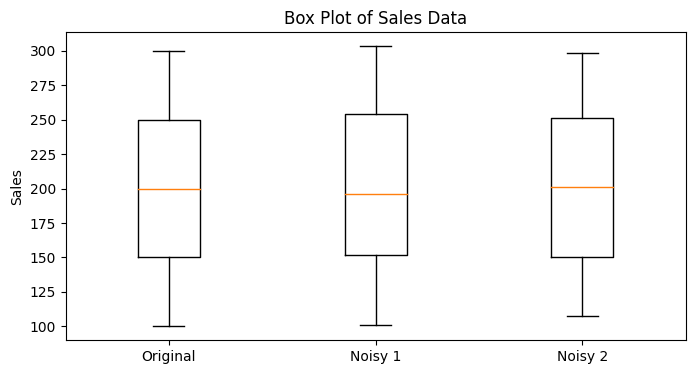

In [172]:
plt.figure(figsize=(8, 4))
plt.boxplot([sales, noisy_sales_1, noisy_sales_2], labels=['Original', 'Noisy 1', 'Noisy 2'])
plt.title('Box Plot of Sales Data')
plt.ylabel('Sales')
plt.show()

Gaussian noise shifts the data slightly, but it still does not drastically change the underlying linear relationship in the data. The impact of this noise on pearson's correlation coefficient is very minimal. 

Personally, I don't think it makes sense to look at the differnce between the two noisy pearaon correlations. I don't see how this is very useful in understanding the effects of noise on the data's linear relationship. Instead, I'm going to compare the difference between the original and the noisy pearson's correlations. I believe this allows for a more complete interpretation.

In [174]:
print('----- Difference between original and first noisy coefficients')
diff = abs(pearson_coeff_1 - original_pearson_coeff)
print(f'Difference = {diff}')
print(f'Difference < 1e-3? {diff < 1e-3}\n')

print('----- Difference between original and second noisy coefficients')
diff = abs(pearson_coeff_2 - original_pearson_coeff)
print(f'Difference = {diff}')
print(f'Difference < 1e-3? {diff < 1e-3}')

----- Difference between original and first noisy coefficients
Difference = 0.0007471788510517996
Difference < 1e-3? True

----- Difference between original and second noisy coefficients
Difference = 0.00035480096263584837
Difference < 1e-3? True


Here we can see that the difference between the original pearsons coefficient and the both noisy coefficients are very minimal, implying that gaussian noise does not effect the underlying linear relationship in the data. However, this is only valid for the mean = 0 and standard deviation = 5 case. What if we introduce different variations of gaussian noise and see the effects of that on pearson's correlation coefficient?

First, we set the mean to 0 and explore the effects of standard deviation on pearson's coefficient. The experiment explores different values of standard deviation ranging from 0 to 10 with a step size of 0.25

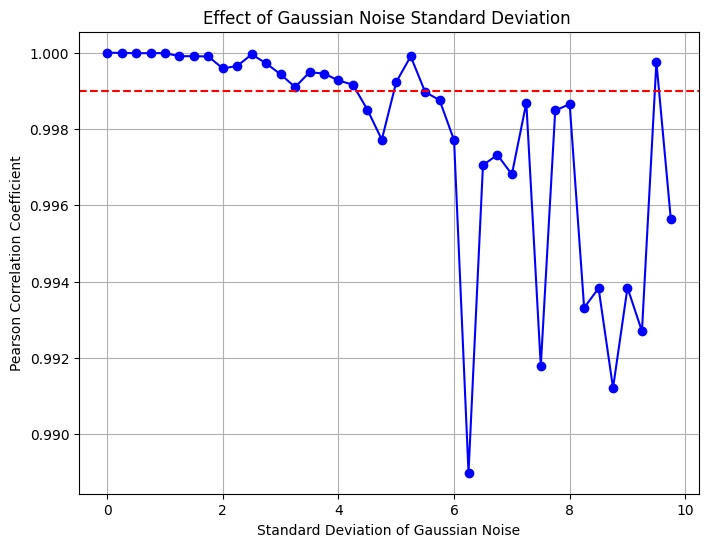

In [184]:
std_devs = np.arange(0, 10, 0.25)

pearson_coeffs = []

for std_dev in std_devs:
    noisy_sales = sales + np.random.normal(0, std_dev, size=sales.shape)
    corr_coeff, _ = pearsonr(temperature, noisy_sales)
    pearson_coeffs.append(corr_coeff)

plt.figure(figsize=(8, 6))
plt.plot(std_devs, pearson_coeffs, marker='o', linestyle='-', color='b')
plt.axhline(y=(original_pearson_coeff - (1e-3)), color='r', linestyle='--', label='1e-3 Correlation Line')
plt.title('Effect of Gaussian Noise Standard Deviation ')
plt.xlabel('Standard Deviation of Gaussian Noise')
plt.ylabel('Pearson Correlation Coefficient')
plt.grid(True)
plt.show()

We can observe that as we increase standard deviation, pearson's correlation decreases with some fluctuations. They're still very strong linear relationships, but they do go down below the 1e-3 difference line once you exceed a standard deviation value of around 6. The fluctuations could be due to the randomness of the noise.

Now, we set the standard deviation to 1 and explore the effects of the mean on pearson's coefficient. The experiment explores different values of mean ranging from 0 to 10 with a step size of 0.25

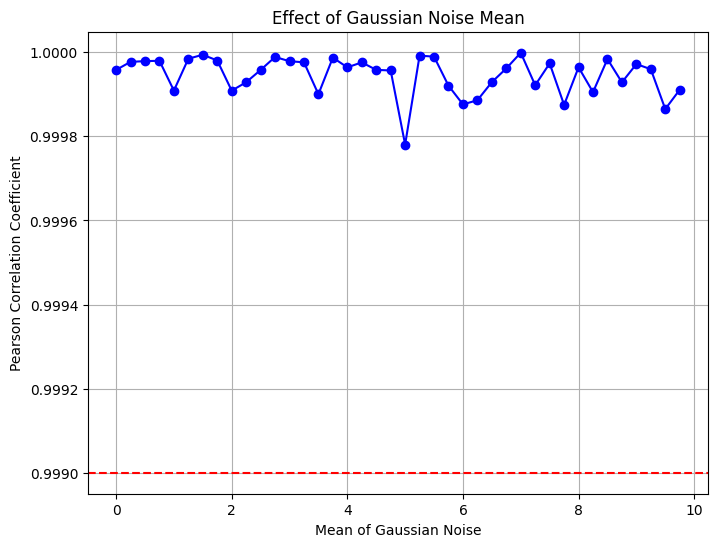

In [186]:
means = np.arange(0, 10, 0.25)

pearson_coeffs = []

for mean in means:
    noisy_sales = sales + np.random.normal(mean, 1, size=sales.shape)
    corr_coeff, _ = pearsonr(temperature, noisy_sales)
    pearson_coeffs.append(corr_coeff)

plt.figure(figsize=(8, 6))
plt.plot(means, pearson_coeffs, marker='o', linestyle='-', color='b')
plt.axhline(y=(original_pearson_coeff - (1e-3)), color='r', linestyle='--', label='1e-3 Correlation Line')
plt.title('Effect of Gaussian Noise Mean')
plt.xlabel('Mean of Gaussian Noise')
plt.ylabel('Pearson Correlation Coefficient')
plt.grid(True)
plt.show()

Here, we can clearly observe that the mean of gaussian noise does not come close to changing pearson's correlation coefficient. We can conclude that the standard deviation of gaussian noise has a much stronger effect on the underlying linear relationships in the data, whilst the mean does not have that effect. 

## Q3: Windowed Aggregation

You are tasked with analyzing the stock prices of Tesla (TSLA) and Ford (F) over a 6-month period. The stock price data for both companies is retrieved using a financial data library. Your tasks involve calculating and plotting rolling means and medians for each company, followed by analyzing the correlation between the stock prices of Tesla and Ford. 

##### Downloading datasets

In [135]:
import yfinance as yf 

# Download stock data for Tesla (TSLA) and Ford (F)
tesla = yf.download('TSLA', period='6mo') 
ford = yf.download('F', period='6mo')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [140]:
tesla.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-15,170.240005,170.690002,161.380005,161.479996,161.479996,100245300
2024-04-16,156.740005,158.190002,153.750000,157.110001,157.110001,97000000
2024-04-17,157.639999,158.330002,153.779999,155.449997,155.449997,82439700
2024-04-18,151.250000,152.199997,148.699997,149.929993,149.929993,96098800
2024-04-19,148.970001,150.940002,146.220001,147.050003,147.050003,86005100


In [138]:
ford.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-15,12.74,12.82,12.18,12.23,11.897914,59484400
2024-04-16,12.14,12.25,11.94,12.09,11.761716,56392200
2024-04-17,12.14,12.25,12.02,12.04,11.713073,43646600
2024-04-18,12.08,12.17,11.98,12.06,11.732531,39902100
2024-04-19,12.02,12.23,12.02,12.14,11.810358,39592900


### Part 1: Calculation of Rolling Mean and Median

#### 1. Calculate and plot the rolling mean and rolling median of the stock prices for each company using the following window sizes: 5-day, 10-day, and 20-day windows.

#### 2. Plot the stock prices of both companies along with their respective rolling means and medians for each window size (5-day, 10-day, and 20-day). The x-axis should represent the trading days, and the y-axis should represent the stock prices.

Six plots are generated, three for each company. Each plot includes the stock prices, rolling mean, and rolling median.

In [151]:
def plot_rolling(company_name, window_size):
    stock_data = tesla if company_name == 'Tesla' else ford

    rolling_mean = stock_data['Close'].rolling(window=window_size).mean()
    rolling_median = stock_data['Close'].rolling(window=window_size).median()

    plt.figure(figsize=(10, 6))

    plt.plot(stock_data['Close'], label=f'{company_name} Stock Price', color='black', alpha=0.5)
    plt.plot(rolling_mean, label=f'{window_size}-Day Rolling Mean', color='blue', linestyle='--')
    plt.plot(rolling_median, label=f'{window_size}-Day Rolling Median', color='green', linestyle='-.')

    plt.title(f'{company_name} Stock Prices with Rolling Mean and Median (Window size = {window_size})')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.grid(True)
    plt.show()

Tesla plots:

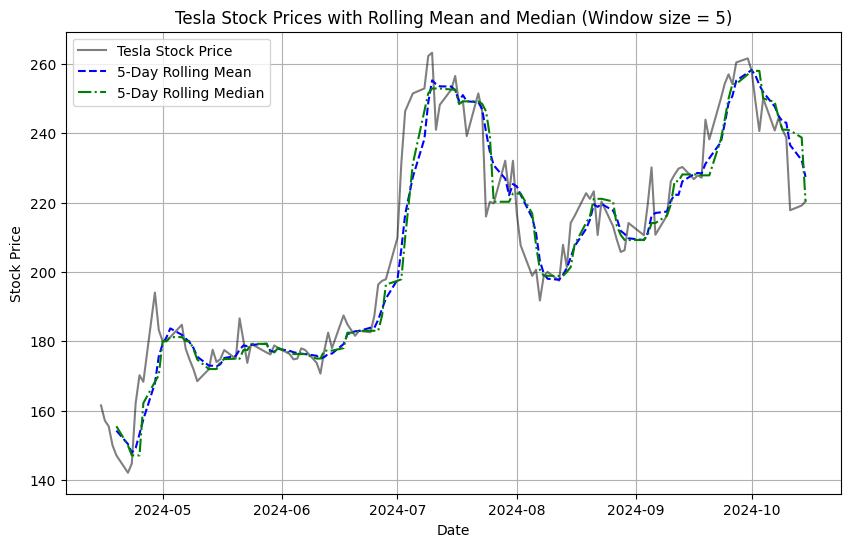

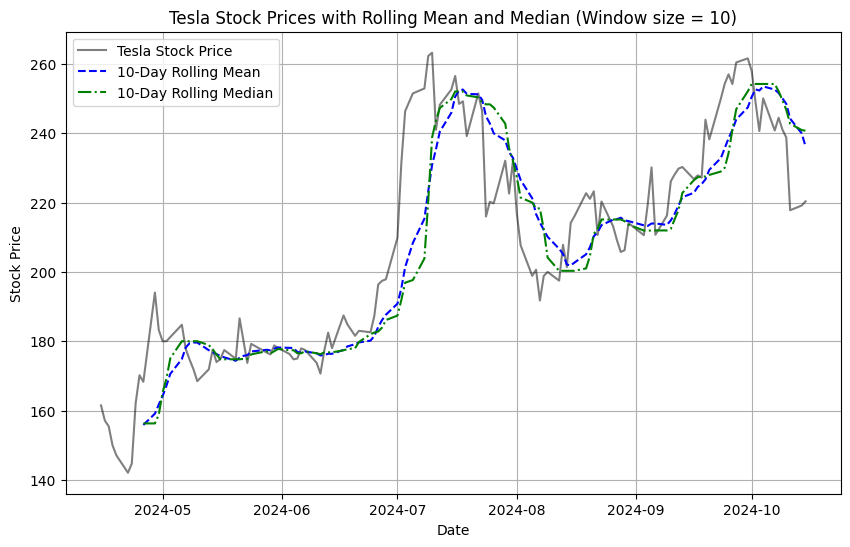

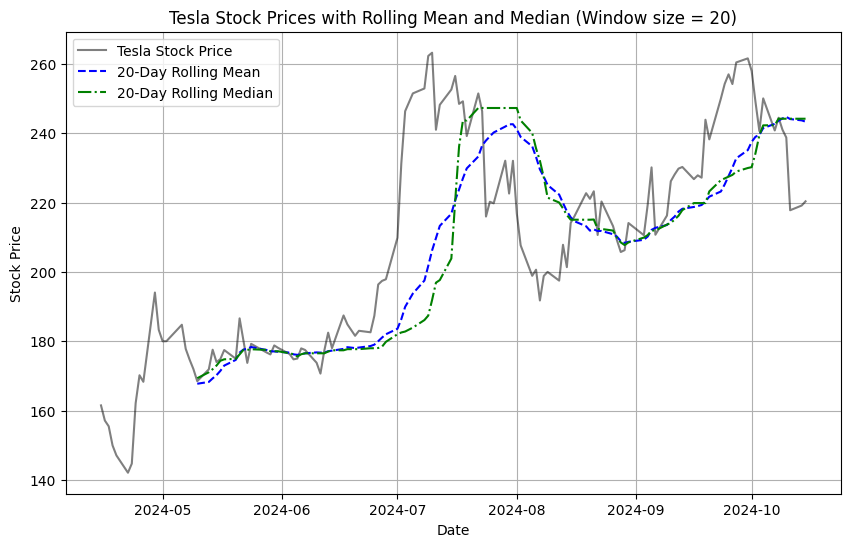

In [152]:
for window in [5, 10, 20]:
    plot_rolling('Tesla', window)

Ford plots:

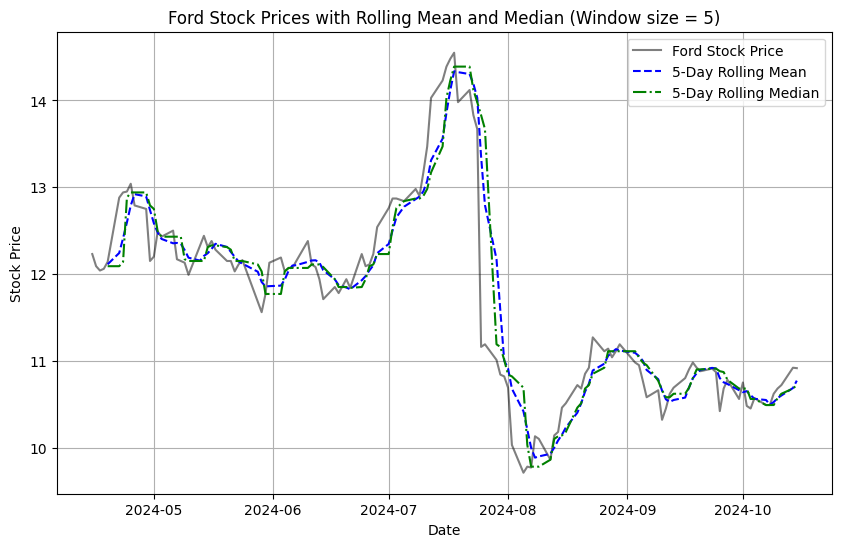

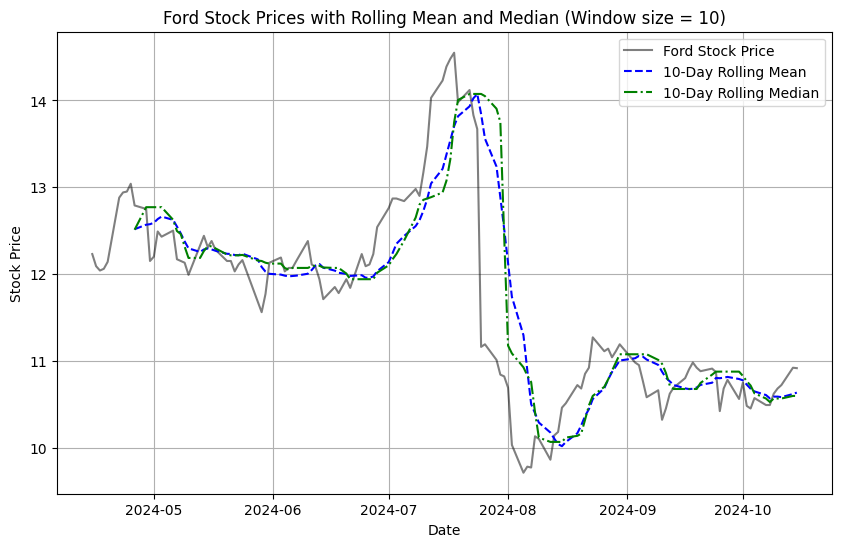

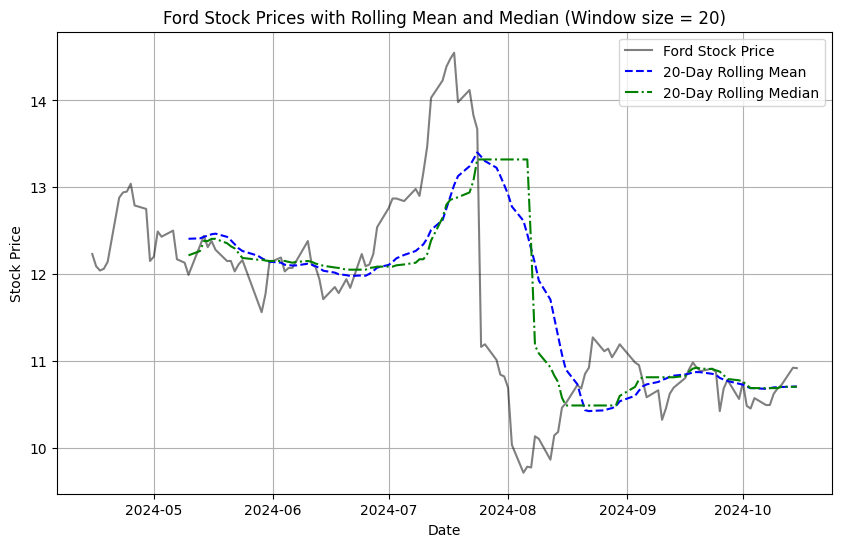

In [153]:
for window in [5, 10, 20]:
    plot_rolling('Ford', window)

### Part 2: Pearson Correlation and Rolling Pearson Correlation

#### 1. Calculate the Pearson correlation coefficient between the stock prices of Tesla and Ford.

In [154]:
pearson_coeff, pearson_pvalue = pearsonr(tesla['Close'], ford['Close'])
print(f'Pearsons Coefficient: {pearson_coeff}')
print(f'P-value: {pearson_pvalue}')
print(f'P-value < 0.05? {pearson_pvalue < 0.05}\n')

Pearsons Coefficient: -0.1381880275702227
P-value: 0.11981392465589172
P-value < 0.05? False



Let the null hypothesis be as follows:

$$ H_0 = \text{There is no linear relationship between Tesla's stock prices and Ford's stock prices} $$

The calculated pearson's correlation coefficient between Tesla and Ford is close to $0$. The calculated p-value $0.12$ is $> 0.05$.

This causes us to fail to reject the null hypothesis, meaning there is no sufficient statistical evidence to conclude that there is a linear relationship between Tesla's stock prices and Ford's stock prices.

#### 2. Compute and plot the rolling Pearson correlation coefficient using a 10-day window to analyze the dynamic relationship between the stock prices of Tesla and Ford over time. Plot the rolling correlation as a function of time.

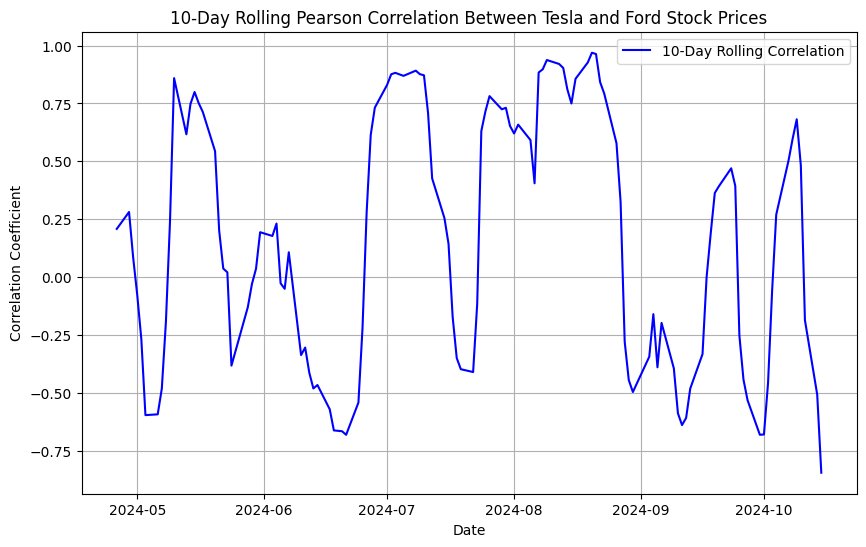

In [155]:
rolling_corr = tesla['Close'].rolling(window=10).corr(ford['Close'])

plt.figure(figsize=(10, 6))
plt.plot(rolling_corr, label='10-Day Rolling Correlation', color='blue')

plt.title('10-Day Rolling Pearson Correlation Between Tesla and Ford Stock Prices')
plt.xlabel('Date')
plt.ylabel('Correlation Coefficient')
plt.legend()
plt.grid(True)
plt.show()

This is a much better indication of the relationship between Tesla's and Ford's stock prices. We can see that despite pearson's coefficient averaging close to 0 (more specifically, -0.138, as calculated above), there are periods of time where the linear relationship is strong in both the negative and positive directions. 